# Proyecto de Machine Learning 

### Curso de inteligencia artificial
#### Presentado a:
Prof. Andres Mauricio Castillo
#### Presentado por:
- Valeria Rivera Muñoz - 1626837
- Juan Felipe Gil Londoño - 1626055
- Mateo Gregory Jimenez - 1629431
    
### Objetivo del proyecto:
    Aplicar el concepto de aprendizaje de máquina para resolver un problema de clasificación usando los métodos vistos en el curso. 

### Obtencion y analisis de los datos:
###### Los datos se obtuvieron los datos del siguiente enlace: [Heart_disease_target](https://www.kaggle.com/ronitf/heart-disease-uci)

# Instalacion de paquetes adicionales

In [1]:
!pip install pydotplus
!pip install graphviz

# Adicionar librerias necesarias
En las siguientes lineas se agregaran todas las librerias necesarias para nuestro proyecto

En el siguiente bloque de codigo se importaran las librerias relacionadas con el manejo de datos de nuestro clasificador

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
import copy

En este bloque se importaran las librearias relacionadas con los modelos de apredizaje de maquina

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Leer los datos

Ahora procedemos a cargar los datos del archivo "Heart_disease_target.csv" donde se encuentran todos los datos necesarios para empezar con los metodos de clasificación

In [5]:
train_target=pd.read_csv("./Heart_disease_target.csv")

# Entender los datos

In [6]:
print(train_target.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Como se puede apreciar en el Output anterior la unica columna que poseee atributos no numericos, osea no categoricas es el lugar y a diferencia del ejemplo del titanic donde la edad se convierte a binaria, en este caso es importante conocer la edad exacta de cada paciente

In [7]:
train_target.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Graficamos un histograma de los datos de cada columna que posee el data set, son un total de 12 columnas

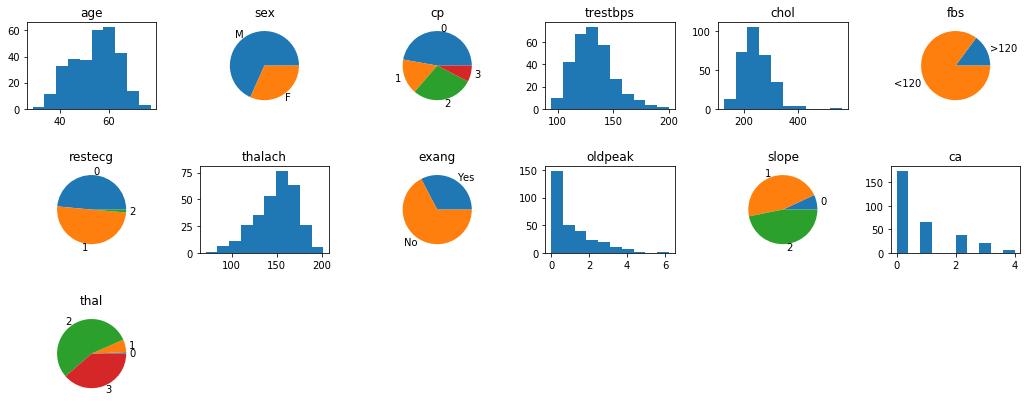

In [8]:
columns=list(train_target.columns)
del(columns[len(columns)-1])

ax1 = plt.axes([0.0, 1.0, 0.3, 0.3])
_ = plt.hist(train_target[columns[0]].dropna())
plt.title(columns[0])

ax2 = plt.axes([0.4, 1.0, 0.3, 0.3])
sexCount=[(train_target[columns[1]]==1).sum(),(train_target[columns[1]]==0).sum()]
_ = plt.pie(sexCount, labels=['M','F'])
plt.title(columns[1])

ax3 = plt.axes([0.8, 1.0, 0.3, 0.3])
cpCount=[(train_target[columns[2]]==0).sum(),(train_target[columns[2]]==1).sum(),
          (train_target[columns[2]]==2).sum(),(train_target[columns[2]]==3).sum()]
_ = plt.pie(cpCount, labels=['0','1','2','3'])
plt.title(columns[2])

ax4 = plt.axes([1.2, 1.0, 0.3, 0.3])
_ = plt.hist(train_target[columns[3]].dropna())
plt.title(columns[3])

ax5 = plt.axes([1.6, 1.0, 0.3, 0.3])
_ = plt.hist(train_target[columns[4]].dropna())
plt.title(columns[4])

ax6 = plt.axes([2.0, 1.0, 0.3, 0.3])
fbsCount=[(train_target[columns[5]]==1).sum(),(train_target[columns[5]]==0).sum()]
_ = plt.pie(fbsCount, labels=['>120','<120'])
plt.title(columns[5])

ax7 = plt.axes([0.0, 0.5, 0.3, 0.3])
restecgCount=[(train_target[columns[6]]==0).sum(),(train_target[columns[6]]==1).sum(),(train_target[columns[6]]==2).sum()]
_ = plt.pie(restecgCount, labels=['0','1','2'])
plt.title(columns[6])

ax8 = plt.axes([0.4, 0.5, 0.3, 0.3])
_ = plt.hist(train_target[columns[7]].dropna())
plt.title(columns[7])

ax9  = plt.axes([0.8, 0.5, 0.3, 0.3])
restecgCount=[(train_target[columns[8]]==1).sum(),(train_target[columns[8]]==0).sum()]
_ = plt.pie(restecgCount, labels=['Yes','No'])
plt.title(columns[8])

ax10 = plt.axes([1.2, 0.5, 0.3, 0.3])
_ = plt.hist(train_target[columns[9]].dropna())
plt.title(columns[9])

ax11 = plt.axes([1.6, 0.5, 0.3, 0.3])
restecgCount=[(train_target[columns[10]]==0).sum(),(train_target[columns[10]]==1).sum(),(train_target[columns[10]]==2).sum()]
_ = plt.pie(restecgCount, labels=['0','1','2'])
plt.title(columns[10])

ax12 = plt.axes([2.0, 0.5, 0.3, 0.3])
_ = plt.hist(train_target[columns[11]].dropna())
plt.title(columns[11])

ax13 = plt.axes([0, 0, 0.3, 0.3])
restecgCount=[(train_target[columns[12]]==0).sum(),(train_target[columns[12]]==1).sum(),(train_target[columns[12]]==2).sum(),
              (train_target[columns[12]]==3).sum()]
_ = plt.pie(restecgCount, labels=['0','1','2','3'])
plt.title(columns[12])

data=[]
for i in columns:
    data.append(copy.deepcopy(train_target[i]))

# Completar o remover los elementos faltantes

Cuantificamos la cantidad de datos faltantes en el conjunto de datos y revisamos en que columnas se encuentran estos datos faltantes

In [9]:
train_target_empty=train_target.columns[train_target.isna().any()].tolist()
print(train_target.isnull().sum().sum())
print(train_target_empty)

0
[]


Hay un total de 0 datos faltantes, por lo que no es necesario llenar los datos faltantes

# Dividir en conjunto en entrenamiento(80%) y pruebas(20%)

In [10]:
features = train_target[columns].values
target = train_target["target"].values

Ahora separamos los datos entre conjunto de entrenamiento y de pruebas

In [11]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2)

## Arboles de decision

In [12]:
decision_tree_model=tree.DecisionTreeClassifier(max_depth=3, min_samples_split=6, min_samples_leaf=1, random_state=None)
trained_decision_tree_model=decision_tree_model.fit(train_x, train_y)

tree_train_scores, tree_test_scores=[], []

for i in range (150):
    tree_train_scores.append(decision_tree_model.score(train_x, train_y))
    tree_test_scores.append(decision_tree_model.score(test_x, test_y))
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2)
    trained_decision_tree_model=decision_tree_model.fit(train_x, train_y)

print(sum(tree_train_scores)/150)
print(sum(tree_test_scores)/150)

print(decision_tree_model)

0.8534435261707983
0.7890710382513663
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [13]:
dot_data = StringIO()
export_graphviz(decision_tree_model, out_file=dot_data, filled=True, rounded=True, 
                feature_names = list(train_target.columns[:13]),class_names = ['no disease','disease'], 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

dot_data = tree.export_graphviz(decision_tree_model, out_file="resume.dot",
feature_names = list(train_target.columns[:13]),class_names=['hired','not-hired'],
filled=True, rounded=True, special_characters=True, leaves_parallel=False)

graph = pydotplus.graphviz.graph_from_dot_file("resume.dot")

Una vez se ha ejecutado el modelo

In [14]:
confusion_matrix(decision_tree_model.predict(test_x), test_y)

array([[26,  6],
       [ 9, 20]], dtype=int64)

# Modelo de Bayes

In [18]:
gaussian_naive_bayes=GaussianNB()
gaussian_model=gaussian_naive_bayes.fit(train_x, train_y)

# Neural Network

In [16]:
# NN is sensitive to data scale. We must normilize
scaler, copy_train_x, copy_test_x= StandardScaler(), train_x.copy(), test_x.copy()
copy_train_x = train_x.copy()
copy_test_x = test_x.copy()
# Don't cheat - fit only on training data
scaler.fit(train_x)  
copy_train_x = scaler.transform(copy_train_x)  
# apply same transformation to test data
copy_test_x = scaler.transform(copy_test_x)  

neural_network_model = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (12,10,8,6,4,2), random_state=1, verbose = True)

neural_network_model.fit(copy_train_x, train_y)                         

print(neural_network_model.score(copy_train_x, train_y)*100, "%")
print(neural_network_model.score(copy_test_x, test_y)*100, "%")

print(confusion_matrix(neural_network_model.predict(copy_train_x), train_y))
print(confusion_matrix(neural_network_model.predict(copy_test_x), test_y))

84.71074380165288 %
77.04918032786885 %
[[ 95  29]
 [  8 110]]
[[28  7]
 [ 7 19]]
